In [1]:
import urllib.request as urllib
from bs4 import BeautifulSoup
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
class Benford:
    
    def __init__(self, url):
        self.html = urllib.urlopen(url)
        self.soup = BeautifulSoup(self.html, 'html.parser')
        
    def all_p(self): # Getting all the paragraphs from the html code
        all_p = self.soup.find_all('p')
        return all_p
        
    def get_numbers(self): # Getting all the numbers from the text body
        numbers = []
        for i in self.all_p():
            just_text = i.get_text().strip()
            for j in just_text.split():
                j = j.replace('%', '')
                j = j.replace('-', '')
                j = j.replace('i', '')
                try:
                    numbers.append(float(j))
                except ValueError:
                    pass
        return numbers
    
    def first_digit(self): # Getting the first digit of all of the numbers in the text body
        first_digits = []
        for i in self.get_numbers():
            i = str(i)
            i = i[0]
            if i != '0':
                first_digits.append(i)
        return first_digits
    
    def graph_benford(self): # Graphing the distribution of leading digits along with a theoretical Benford curve
        count_dict = dict(Counter(self.first_digit()).items())
        
        nums = ['1', '2', '3', '4', '5', '6', '7', '8', '9']
        
        for x in nums:
            if x not in count_dict.keys():
                count_dict[x] = 0
        
        x = count_dict.keys()
        y = count_dict.values()
        
        list1, list2 = zip(*sorted(zip(x, y)))

        total = sum(y)
        benf = [0.301, 0.176, 0.125, 0.097, 0.079, 0.067, 0.058, 0.051, 0.046]
        benf_y = []

        for num in benf:
            num_benf = num * total
            benf_y.append(num_benf)

        plt.bar(list1, list2)
        plt.plot(list1, benf_y, color = 'red')

In [3]:
benford = Benford('https://en.wikipedia.org/wiki/Benford%27s_law#:~:text=Benford%27s%20law%2C%20also%20called%20the,life%20sets%20of%20numerical%20data.&text=If%20the%20digits%20were%20distributed,about%2011.1%25%20of%20the%20time.')

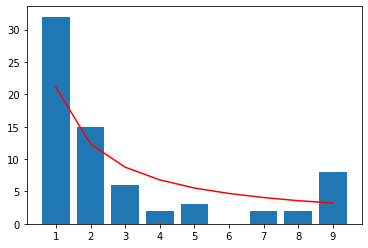

In [4]:
benford.graph_benford()

In [65]:
number = Benford('https://en.wikipedia.org/wiki/Number')

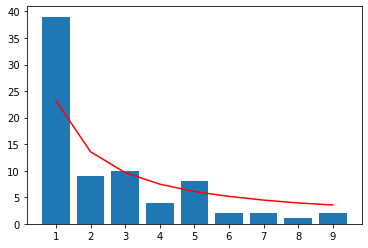

In [66]:
number.graph_benford()

In [67]:
size_of_wiki = Benford('https://en.wikipedia.org/wiki/Wikipedia:Size_of_Wikipedia')

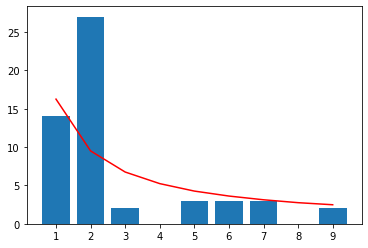

In [68]:
size_of_wiki.graph_benford()

In [7]:
stock_market = Benford('https://en.wikipedia.org/wiki/Stock_market')

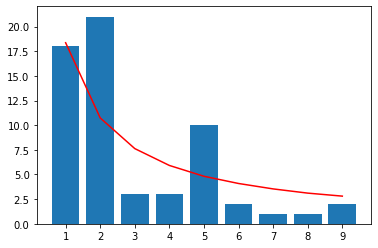

In [8]:
stock_market.graph_benford()